In [1]:
import os, os.path, sqlite3, pandas as pd, numpy as np, functools, scipy as sp, scipy.stats, seaborn as sns, matplotlib.pyplot as plt
from af2genomics import *

/cluster/project/beltrao/jjaenes/software/miniconda3/envs/af2genomics-env/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
#suppl_ppi_residues(pdockq=.23)
suppl_ppi_models(pdockq=.23)

,interaction_id,pdockq,uniprot_id1,uniprot_id2,chain1,chain2,ifresid1,ifresid2,sources,n_references,pdb
0,O75106_Q16853,0.74,O75106,Q16853,A,B,"R169,A203,A204,V205,H206,L212,R213,W220,N226,I...","P39,V209,L218,Q219,W226,N232,I233,S234,G235,A2...","BioGRID,humap,intact,string",2,O75106/O75106_Q16853.pdb
1,Q15118_Q15118,0.73,Q15118,Q15118,A,B,"S53,P54,P56,Y179,D182,R183,M186,L255,A257,H304...","S53,P54,P56,Y179,D182,R183,M186,E253,L255,A257...","BioGRID,intact",2,Q15118/Q15118_Q15118.pdb
2,P11142_Q92598,0.73,P11142,Q92598,A,B,"K25,E27,I28,A30,N31,D32,Q33,G34,R36,E48,L50,D5...","R19,A27,N28,E29,F30,S31,R33,N54,T58,Y184,R261,...","BioGRID,corum,humap,intact,otar,string,xlinkdb",9,P11142/P11142_Q92598.pdb
3,Q13326_Q16585,0.73,Q13326,Q16585,A,B,"V40,L41,L43,L44,L47,V48,N50,L51,T54,I55,L58,F6...","V68,I69,L71,L72,L75,A76,I78,N79,I82,I86,M100,F...","corum,otar,string",0,Q13326/Q13326_Q16585.pdb
4,Q13326_Q92629,0.73,Q13326,Q92629,A,B,"K33,L36,Y37,V40,L41,L43,L44,L47,V48,N50,L51,T5...","R30,K31,C33,L34,F37,V38,L40,L41,L44,I45,V47,N4...","corum,string",0,Q13326/Q13326_Q92629.pdb
...,...,...,...,...,...,...,...,...,...,...,...
103858,P05107_Q6UY14,0.24,Q6UY14,P05107,A,B,"Q416,E419,L420,N421,Y430,R432,H433,T434,E435,K436","G707,V709,A710,G711,I712,V713,L714,I715,G716,I...","BioGRID,huri",1,P05107/P05107_Q6UY14.pdb
103859,Q07820_Q96FJ2,0.24,Q07820,Q96FJ2,A,B,"D256,V258,T259,N260,W261,G262,W305,Q309,G314,E...","V7,I8,K9,N10,A11,D12,K71,F73,Y75,Y77,G79,Q80",BioGRID,1,Q07820/Q07820_Q96FJ2.pdb
103860,P27348_Q9Y4H2,0.24,P27348,Q9Y4H2,A,B,,,"BioGRID,bioplex,intact,string",5,P27348/P27348_Q9Y4H2.pdb
103861,P21281_Q13488,0.24,P21281,Q13488,A,B,"R308,S311,A312,A313,R314,E315,E316,V317,P318,E442","N41,A42,S43,V44,S45,F47,Q48,H177","BioGRID,bioplex,otar,string",1,P21281/P21281_Q13488.pdb


In [7]:
# Simple query
query_missense(['P09874/S568F', 'P09874/D678H'])

,variant_id,ESM1b_LLR,ESM1b_is_pathogenic,am_pathogenicity,am_class,eve,pred_ddg,plddt,sasa,pocketscore,pocketrank,interface,interface_strict,freq,xref,significance,association,clintype
0,P09874/D678H,-11.783,pathogenic,0.9286,pathogenic,0.848019,3.79725,87.95,47.0,NaN,NaN,NaN,NaN,NaN,UNK,UNK,UNK,2.0
1,P09874/S568F,-14.022,pathogenic,0.9982,pathogenic,0.836610,6.84845,93.05,13.0,76.229073,3.0,NaN,NaN,NaN,UNK,UNK,UNK,2.0


In [2]:
frame_clinvar = merge_missense(read_Cheng2023_s5(), 'protein_variant')
frame_clinvar

merge_missense: 82,872 raw records
merge_missense: 72,002 records matched to predictions
merge_missense: 15,746 annotated as destabilizing
merge_missense: 14,493 annotated with pockets
read_af2_human_interactions: 486,099 raw records from /cluster/work/beltrao/jjaenes/24.01.30_af2_human_interations/24.01.30_af2_human_interactions.tsv
read_af2_human_interactions: 485,410 after removing negatome-only interactions
read_af2_human_interactions: 24,099 after filtering for pdockq
merge_missense: 8,229 annotated with interfaces


,variant_id,transcript_id,protein_variant,AlphaMissense,label,am_pathogenicity,am_class,am_label,pred_ddg,pred_ddg_label,pocket_label,interface_label
0,chr1_925969_C_T_hg38,ENST00000342066.8,Q96NU1/P10S,0.967398,0,0.9673,pathogenic,True,1.198990,False,False,False
1,chr1_930165_G_A_hg38,ENST00000342066.8,Q96NU1/R28Q,0.662765,0,0.6624,pathogenic,True,NaN,False,False,False
2,chr1_930204_G_A_hg38,ENST00000342066.8,Q96NU1/R41Q,0.086645,0,0.0866,benign,False,NaN,False,False,False
3,chr1_930245_G_A_hg38,ENST00000342066.8,Q96NU1/D55N,0.133919,0,0.1339,benign,False,NaN,False,False,False
4,chr1_930248_G_A_hg38,ENST00000342066.8,Q96NU1/G56S,0.100393,0,0.1004,benign,False,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
71997,chrX_154993044_G_A_hg38,ENST00000360256.9,P00451/P165S,0.671145,1,0.6708,pathogenic,True,4.751550,True,False,False
71998,chrX_154997038_T_G_hg38,ENST00000360256.9,P00451/K108T,0.663989,1,0.6637,pathogenic,True,0.100276,False,False,False
71999,chrX_155022432_C_A_hg38,ENST00000360256.9,P00451/G41C,0.115541,1,0.1155,benign,False,-0.774991,False,True,False
72000,chrX_155260942_G_T_hg38,ENST00000369454.4,Q96DA2/T168K,0.988562,1,0.9885,pathogenic,True,3.136670,True,False,False


In [3]:
frame_cancer = merge_missense(read_Cheng2023_s6(), 'protein_variant')
frame_cancer

merge_missense: 2,601 raw records
merge_missense: 2,316 records matched to predictions
merge_missense: 411 annotated as destabilizing
merge_missense: 554 annotated with pockets
merge_missense: 475 annotated with interfaces


,variant_id,transcript_id,protein_variant,AlphaMissense,label,am_pathogenicity,am_class,am_label,pred_ddg,pred_ddg_label,pocket_label,interface_label
0,chr15_40382900_G_A_hg38,ENST00000249776.12,Q9Y448/C22Y,0.086676,1,0.0867,benign,False,-0.372751,False,False,False
1,chr12_913902_C_T_hg38,ENST00000430095.6,P43351/R396H,0.056817,1,0.0568,benign,False,NaN,False,False,False
2,chr6_31972346_G_A_hg38,ENST00000375333.2,P49842/D89N,0.090475,1,0.0905,benign,False,NaN,False,False,False
3,chr1_119997045_T_A_hg38,ENST00000256646.7,Q04721/T235S,0.384940,1,0.3847,ambiguous,False,0.084339,False,False,False
4,chr20_9580616_C_T_hg38,ENST00000378429.3,Q9P286/M173I,0.118534,1,0.1185,benign,False,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2311,chr16_89283571_C_T_hg38,ENST00000642600.1,Q6UB99/G991S,0.077803,0,0.0778,benign,False,NaN,False,False,False
2312,chr16_89282818_C_T_hg38,ENST00000642600.1,Q6UB99/A1242T,0.070514,0,0.0705,benign,False,NaN,False,False,False
2313,chr16_89282108_G_C_hg38,ENST00000642600.1,Q6UB99/D1478E,0.128539,0,0.1285,benign,False,0.178235,False,False,False
2314,chr16_89281658_G_T_hg38,ENST00000642600.1,Q6UB99/D1628E,0.084066,0,0.0841,benign,False,NaN,False,False,False


In [4]:
frame_ddd = merge_missense(read_Cheng2023_s7(), 'protein_variant')
frame_ddd

merge_missense: 410 raw records
merge_missense: 377 records matched to predictions
merge_missense: 98 annotated as destabilizing
merge_missense: 98 annotated with pockets
merge_missense: 51 annotated with interfaces


,variant_id,transcript_id,protein_variant,AlphaMissense,label,am_pathogenicity,am_class,am_label,pred_ddg,pred_ddg_label,pocket_label,interface_label
0,chr6_83877840_A_G_hg19,ENST00000349129.2,Q5JWR5/E2451G,0.632321,1,0.6320,pathogenic,True,2.009640,True,False,False
1,chr14_100742866_A_G_hg19,ENST00000262238.4,P25490/K315E,0.996075,1,0.9961,pathogenic,True,0.164803,False,False,False
2,chrX_123197045_G_A_hg19,ENST00000371144.3,Q8N3U4/R604Q,0.988354,1,0.9883,pathogenic,True,NaN,False,False,False
3,chr19_13135878_G_T_hg19,ENST00000592199.1,Q14938/R24L,0.973736,1,0.9737,pathogenic,True,NaN,False,False,False
4,chr11_64535132_T_C_hg19,ENST00000377390.3,Q15637/N418S,0.073384,1,0.0734,benign,False,0.237152,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
372,chrX_48374469_C_T_hg19,ENST00000326194.6,Q9H237/R370W,0.105351,0,0.1053,benign,False,0.050095,False,False,False
373,chrX_53223460_T_A_hg19,ENST00000375401.3,P41229/D1300V,0.187970,0,0.1879,benign,False,0.770946,False,False,False
374,chrX_54037669_G_A_hg19,ENST00000357988.5,Q9UPP1/L314F,0.771051,0,0.7707,pathogenic,True,0.255098,False,False,True
375,chrX_73964160_G_C_hg19,ENST00000055682.6,Q5QGS0/P78A,0.062320,0,0.0623,benign,False,NaN,False,False,False


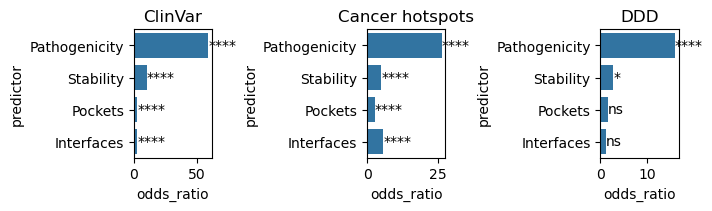

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 2), constrained_layout=True)

plt.subplot(1, 3, 1)

plt.title(f'ClinVar')
plot_merge_missense(frame_clinvar, col='label')

plt.subplot(1, 3, 2)
plt.title(f'Cancer hotspots')
plot_merge_missense(frame_cancer, col='label')

plt.subplot(1, 3, 3)
plt.title(f'DDD')
plot_merge_missense(frame_ddd, col='label')
plt.savefig('missense_enrichment.svg', bbox_inches='tight', transparent=True)